# Learn Time Series Basic With Machine Learning Approach

## Part I

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/london-homes-energy-data/london_energy.csv')
df.head(3)

,LCLid,Date,KWH
0,MAC000002,2012-10-12,7.098
1,MAC000002,2012-10-13,11.087
2,MAC000002,2012-10-14,13.223


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   LCLid   object 
 1   Date    object 
 2   KWH     float64
dtypes: float64(1), object(2)
memory usage: 80.3+ MB


In [4]:
df.isnull().sum()

LCLid    0
Date     0
KWH      0
dtype: int64

In [5]:
df_avg_consumption = df.groupby('Date')['KWH'].mean()
df_avg_consumption = pd.DataFrame({
    'date': df_avg_consumption.index.tolist(),
    'consumption': df_avg_consumption.values.tolist()
})
df_avg_consumption['date'] = pd.to_datetime(df_avg_consumption['date'])
df_avg_consumption

,date,consumption
0,2011-11-23,6.952692
1,2011-11-24,8.536480
2,2011-11-25,9.499781
3,2011-11-26,10.267707
4,2011-11-27,10.850805
...,...,...
824,2014-02-24,10.411403
825,2014-02-25,10.294997
826,2014-02-26,10.202945
827,2014-02-27,10.356350


In [6]:
df_avg_consumption['date'].min(), df_avg_consumption['date'].max()

(Timestamp('2011-11-23 00:00:00'), Timestamp('2014-02-28 00:00:00'))

<Axes: xlabel='date'>

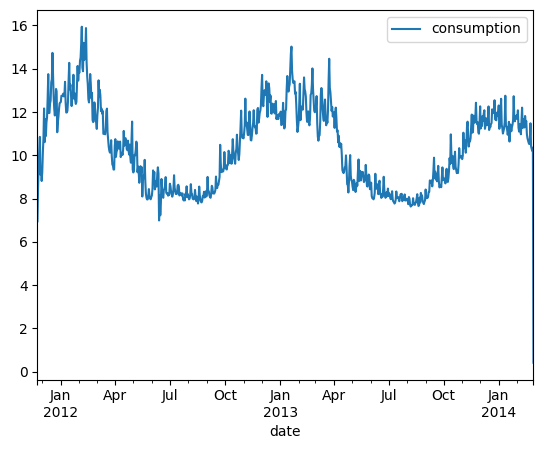

In [7]:
df_avg_consumption.plot(x='date',y='consumption')

<Axes: xlabel='date'>

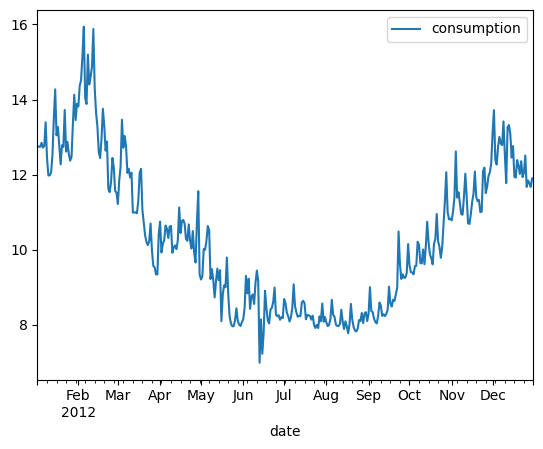

In [8]:
df_avg_consumption.query("date > '2012-01-01' & date < '2013-01-01'").plot(x="date", y="consumption")

In [9]:
df_avg_consumption['day_of_week'] = df_avg_consumption['date'].dt.dayofweek
df_avg_consumption['day_of_year'] = df_avg_consumption['date'].dt.dayofyear
df_avg_consumption['month'] = df_avg_consumption['date'].dt.month
df_avg_consumption['quarter'] = df_avg_consumption['date'].dt.quarter
df_avg_consumption['year'] = df_avg_consumption['date'].dt.year

# Menggunakan representasi sin/cos untuk fitur siklik
# Representasi sin dan cos untuk hari dalam seminggu (0-6)
df_avg_consumption['day_of_week_sin'] = np.sin(2 * np.pi * df_avg_consumption['day_of_week'] / 7)
df_avg_consumption['day_of_week_cos'] = np.cos(2 * np.pi * df_avg_consumption['day_of_week'] / 7)

# Representasi sin dan cos untuk hari dalam setahun (1-365/366)
df_avg_consumption['day_of_year_sin'] = np.sin(2 * np.pi * df_avg_consumption['day_of_year'] / 365)
df_avg_consumption['day_of_year_cos'] = np.cos(2 * np.pi * df_avg_consumption['day_of_year'] / 365)

# Representasi sin dan cos untuk bulan (1-12)
df_avg_consumption['month_sin'] = np.sin(2 * np.pi * df_avg_consumption['month'] / 12)
df_avg_consumption['month_cos'] = np.cos(2 * np.pi * df_avg_consumption['month'] / 12)

# Representasi sin dan cos untuk quarter (1-4)
df_avg_consumption['quarter_sin'] = np.sin(2 * np.pi * df_avg_consumption['quarter'] / 4)
df_avg_consumption['quarter_cos'] = np.cos(2 * np.pi * df_avg_consumption['quarter'] / 4)

df_avg_consumption.head(3)

,date,consumption,day_of_week,day_of_year,month,quarter,year,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos,month_sin,month_cos,quarter_sin,quarter_cos
0,2011-11-23,6.952692,2,327,11,4,2011,0.974928,-0.222521,-0.608477,0.793572,-0.5,0.866025,-2.449294e-16,1.0
1,2011-11-24,8.536480,3,328,11,4,2011,0.433884,-0.900969,-0.594727,0.803928,-0.5,0.866025,-2.449294e-16,1.0
2,2011-11-25,9.499781,4,329,11,4,2011,-0.433884,-0.900969,-0.580800,0.814046,-0.5,0.866025,-2.449294e-16,1.0


In [10]:
training_mask = df_avg_consumption["date"] < "2013-07-28"
training_data = df_avg_consumption.loc[training_mask]

testing_mask = df_avg_consumption["date"] >= "2013-07-28"
testing_data = df_avg_consumption.loc[testing_mask]

training_data.shape, testing_data.shape

((613, 15), (216, 15))

In [11]:
training_data

,date,consumption,day_of_week,day_of_year,month,quarter,year,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos,month_sin,month_cos,quarter_sin,quarter_cos
0,2011-11-23,6.952692,2,327,11,4,2011,0.974928,-0.222521,-0.608477,0.793572,-0.5,0.866025,-2.449294e-16,1.000000e+00
1,2011-11-24,8.536480,3,328,11,4,2011,0.433884,-0.900969,-0.594727,0.803928,-0.5,0.866025,-2.449294e-16,1.000000e+00
2,2011-11-25,9.499781,4,329,11,4,2011,-0.433884,-0.900969,-0.580800,0.814046,-0.5,0.866025,-2.449294e-16,1.000000e+00
3,2011-11-26,10.267707,5,330,11,4,2011,-0.974928,-0.222521,-0.566702,0.823923,-0.5,0.866025,-2.449294e-16,1.000000e+00
4,2011-11-27,10.850805,6,331,11,4,2011,-0.781831,0.623490,-0.552435,0.833556,-0.5,0.866025,-2.449294e-16,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,2013-07-23,8.221957,1,204,7,3,2013,0.781831,0.623490,-0.361714,-0.932289,-0.5,-0.866025,-1.000000e+00,-1.836970e-16
609,2013-07-24,7.879713,2,205,7,3,2013,0.974928,-0.222521,-0.377708,-0.925925,-0.5,-0.866025,-1.000000e+00,-1.836970e-16
610,2013-07-25,7.973942,3,206,7,3,2013,0.433884,-0.900969,-0.393590,-0.919286,-0.5,-0.866025,-1.000000e+00,-1.836970e-16
611,2013-07-26,7.936592,4,207,7,3,2013,-0.433884,-0.900969,-0.409356,-0.912375,-0.5,-0.866025,-1.000000e+00,-1.836970e-16


In [12]:
testing_data

,date,consumption,day_of_week,day_of_year,month,quarter,year,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos,month_sin,month_cos,quarter_sin,quarter_cos
613,2013-07-28,8.191859,6,209,7,3,2013,-0.781831,0.623490,-0.440519,-0.897743,-0.500000,-0.866025,-1.0,-1.836970e-16
614,2013-07-29,7.907554,0,210,7,3,2013,0.000000,1.000000,-0.455907,-0.890028,-0.500000,-0.866025,-1.0,-1.836970e-16
615,2013-07-30,7.999817,1,211,7,3,2013,0.781831,0.623490,-0.471160,-0.882048,-0.500000,-0.866025,-1.0,-1.836970e-16
616,2013-07-31,7.959776,2,212,7,3,2013,0.974928,-0.222521,-0.486273,-0.873807,-0.500000,-0.866025,-1.0,-1.836970e-16
617,2013-08-01,7.913224,3,213,8,3,2013,0.433884,-0.900969,-0.501242,-0.865307,-0.866025,-0.500000,-1.0,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,2014-02-24,10.411403,0,55,2,1,2014,0.000000,1.000000,0.811539,0.584298,0.866025,0.500000,1.0,6.123234e-17
825,2014-02-25,10.294997,1,56,2,1,2014,0.781831,0.623490,0.821477,0.570242,0.866025,0.500000,1.0,6.123234e-17
826,2014-02-26,10.202945,2,57,2,1,2014,0.974928,-0.222521,0.831171,0.556017,0.866025,0.500000,1.0,6.123234e-17
827,2014-02-27,10.356350,3,58,2,1,2014,0.433884,-0.900969,0.840618,0.541628,0.866025,0.500000,1.0,6.123234e-17


<Axes: xlabel='date'>

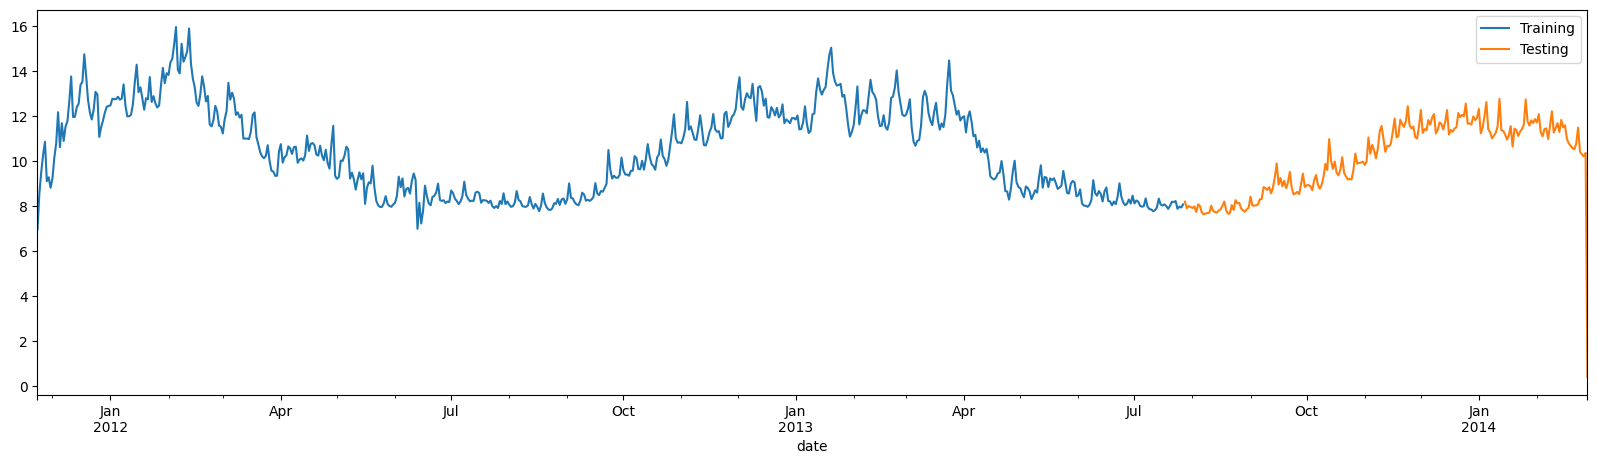

In [13]:
fig, ax = plt.subplots(figsize=(20,5))
training_data.plot(ax=ax, label='Training', x='date', y='consumption')
testing_data.plot(ax=ax, label='Testing', x='date', y='consumption')

In [14]:
training_data = training_data.drop(columns=['date'])
testing_dates = testing_data['date']
testing_data = testing_data.drop(columns=['date'])

# Memperbarui X_train dan X_test dengan fitur sin dan cos yang baru
X_train = training_data[
    [
        'day_of_week_sin', 'day_of_week_cos',
        'day_of_year_sin', 'day_of_year_cos',
        'month_sin', 'month_cos',
        'quarter_sin', 'quarter_cos',
        'year'  # Kolom year tetap bisa dipertahankan jika ada pengaruh tren tahunan
    ]
]
y_train = training_data['consumption']

X_test = testing_data[
    [
        'day_of_week_sin', 'day_of_week_cos',
        'day_of_year_sin', 'day_of_year_cos',
        'month_sin', 'month_cos',
        'quarter_sin', 'quarter_cos',
        'year'
    ]
]
y_test = testing_data['consumption']

In [15]:
X_train.shape, y_train.shape

((613, 9), (613,))

In [16]:
X_test.shape, y_test.shape

((216, 9), (216,))

In [17]:
X_train

,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos,month_sin,month_cos,quarter_sin,quarter_cos,year
0,0.974928,-0.222521,-0.608477,0.793572,-0.5,0.866025,-2.449294e-16,1.000000e+00,2011
1,0.433884,-0.900969,-0.594727,0.803928,-0.5,0.866025,-2.449294e-16,1.000000e+00,2011
2,-0.433884,-0.900969,-0.580800,0.814046,-0.5,0.866025,-2.449294e-16,1.000000e+00,2011
3,-0.974928,-0.222521,-0.566702,0.823923,-0.5,0.866025,-2.449294e-16,1.000000e+00,2011
4,-0.781831,0.623490,-0.552435,0.833556,-0.5,0.866025,-2.449294e-16,1.000000e+00,2011
...,...,...,...,...,...,...,...,...,...
608,0.781831,0.623490,-0.361714,-0.932289,-0.5,-0.866025,-1.000000e+00,-1.836970e-16,2013
609,0.974928,-0.222521,-0.377708,-0.925925,-0.5,-0.866025,-1.000000e+00,-1.836970e-16,2013
610,0.433884,-0.900969,-0.393590,-0.919286,-0.5,-0.866025,-1.000000e+00,-1.836970e-16,2013
611,-0.433884,-0.900969,-0.409356,-0.912375,-0.5,-0.866025,-1.000000e+00,-1.836970e-16,2013


In [18]:
y_train

0       6.952692
1       8.536480
2       9.499781
3      10.267707
4      10.850805
         ...    
608     8.221957
609     7.879713
610     7.973942
611     7.936592
612     8.073559
Name: consumption, Length: 613, dtype: float64

In [19]:
X_test

,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos,month_sin,month_cos,quarter_sin,quarter_cos,year
613,-0.781831,0.623490,-0.440519,-0.897743,-0.500000,-0.866025,-1.0,-1.836970e-16,2013
614,0.000000,1.000000,-0.455907,-0.890028,-0.500000,-0.866025,-1.0,-1.836970e-16,2013
615,0.781831,0.623490,-0.471160,-0.882048,-0.500000,-0.866025,-1.0,-1.836970e-16,2013
616,0.974928,-0.222521,-0.486273,-0.873807,-0.500000,-0.866025,-1.0,-1.836970e-16,2013
617,0.433884,-0.900969,-0.501242,-0.865307,-0.866025,-0.500000,-1.0,-1.836970e-16,2013
...,...,...,...,...,...,...,...,...,...
824,0.000000,1.000000,0.811539,0.584298,0.866025,0.500000,1.0,6.123234e-17,2014
825,0.781831,0.623490,0.821477,0.570242,0.866025,0.500000,1.0,6.123234e-17,2014
826,0.974928,-0.222521,0.831171,0.556017,0.866025,0.500000,1.0,6.123234e-17,2014
827,0.433884,-0.900969,0.840618,0.541628,0.866025,0.500000,1.0,6.123234e-17,2014


In [20]:
y_test

613     8.191859
614     7.907554
615     7.999817
616     7.959776
617     7.913224
         ...    
824    10.411403
825    10.294997
826    10.202945
827    10.356350
828     0.417993
Name: consumption, Length: 216, dtype: float64

In [21]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

def evaluate_model(y_test, prediction):
    print(f"MAE: {mean_absolute_error(y_test, prediction)}")
    print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
    print(f"MSE: {mean_squared_error(y_test, prediction)}")
    
def plot_predictions(testing_dates, y_test, prediction):
    df_test = pd.DataFrame({
        'date': testing_dates,
        'actual': y_test,
        'prediction': prediction
    })
    fig, ax = plt.subplots(figsize=(10,5))
    df_test.plot(ax=ax, label='Actual', x='date', y='actual')
    df_test.plot(ax=ax, label='Prediction', x='date', y='prediction')
    plt.legend(['Actual','Prediction'])
    plt.show()

In [22]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

cv_split = TimeSeriesSplit(n_splits=4, test_size=100)

xgb_model = XGBRegressor()
parameters = {
    'max_depth': [3,4,5,6,7,10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [100,300,500,700,900,1000],
    'colsample_bytree': [0.3, 0.5, 0.7]
}

grid_search = GridSearchCV(estimator=xgb_model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=100),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, impo...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6, 7, 10],
                         'n_estimators': [100, 300, 500, 700, 900, 1000]})

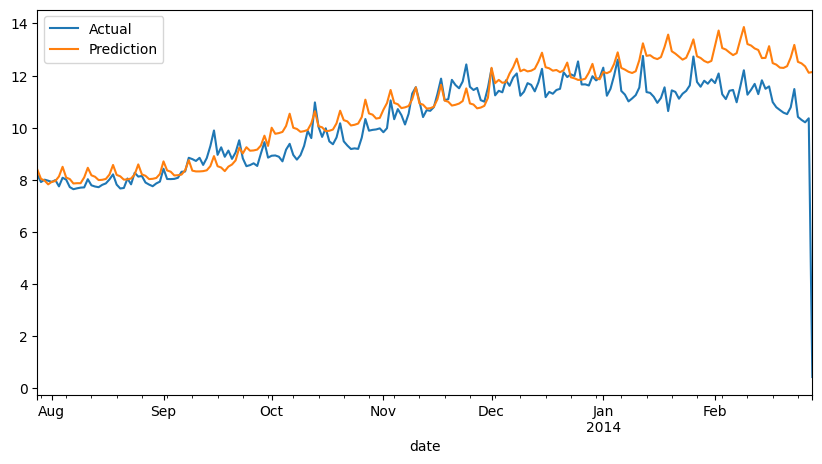

MAE: 0.7453189271255004
MAPE: 0.1959089667428385
MSE: 1.4247254065642283


In [23]:
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)

In [24]:
# cv_split = TimeSeriesSplit(n_splits=4, test_size=100)

# lgbm_model = LGBMRegressor()
# parameters = {
#     'max_depth': [3,4,5,6,7,10],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#     'n_estimators': [100,300,500,700,900,1000],
#     'colsample_bytree': [0.3, 0.5, 0.7]
# }

# grid_search = GridSearchCV(estimator=lgbm_model, cv=cv_split, param_grid=parameters)
# grid_search.fit(X_train, y_train)

In [25]:
# prediction = grid_search.predict(X_test)
# plot_prediction(testing_dates, y_test, prediction)
# evaluate_model(y_test, prediction)

In [26]:
df_weather = pd.read_csv('/kaggle/input/london-weather/london_weather.csv')
df_weather.head(3)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0


In [27]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [28]:
df_weather.isna().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [29]:
df_weather = df_weather.ffill()
df_weather.isna().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [30]:
df_weather['date'] = pd.to_datetime(df_weather['date'], format='%Y%m%d')
df_avg_consumption = df_avg_consumption.merge(df_weather, how='inner', on='date')
df_avg_consumption

,date,consumption,day_of_week,day_of_year,month,quarter,year,day_of_week_sin,day_of_week_cos,day_of_year_sin,...,quarter_cos,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,2011-11-23,6.952692,2,327,11,4,2011,0.974928,-0.222521,-0.608477,...,1.000000e+00,7.0,2.0,35.0,13.5,6.8,2.6,0.2,102720.0,0.0
1,2011-11-24,8.536480,3,328,11,4,2011,0.433884,-0.900969,-0.594727,...,1.000000e+00,3.0,2.0,35.0,12.5,8.6,3.7,0.2,102710.0,0.0
2,2011-11-25,9.499781,4,329,11,4,2011,-0.433884,-0.900969,-0.580800,...,1.000000e+00,3.0,5.0,52.0,14.0,11.0,9.5,0.0,102450.0,0.0
3,2011-11-26,10.267707,5,330,11,4,2011,-0.974928,-0.222521,-0.566702,...,1.000000e+00,4.0,0.7,24.0,13.9,10.2,6.3,0.0,102580.0,0.0
4,2011-11-27,10.850805,6,331,11,4,2011,-0.781831,0.623490,-0.552435,...,1.000000e+00,3.0,5.9,55.0,13.2,11.8,9.7,0.0,102130.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,2014-02-24,10.411403,0,55,2,1,2014,0.000000,1.000000,0.811539,...,6.123234e-17,4.0,4.4,82.0,10.7,10.9,6.8,3.2,100500.0,0.0
825,2014-02-25,10.294997,1,56,2,1,2014,0.781831,0.623490,0.821477,...,6.123234e-17,5.0,2.0,60.0,11.8,9.4,8.1,2.6,100050.0,0.0
826,2014-02-26,10.202945,2,57,2,1,2014,0.974928,-0.222521,0.831171,...,6.123234e-17,1.0,7.7,111.0,12.0,7.4,2.9,2.8,101270.0,0.0
827,2014-02-27,10.356350,3,58,2,1,2014,0.433884,-0.900969,0.840618,...,6.123234e-17,4.0,4.9,90.0,8.4,8.9,5.7,4.8,100700.0,0.0


In [31]:
training_mask = df_avg_consumption["date"] < "2013-07-28"
training_data = df_avg_consumption.loc[training_mask]

testing_mask = df_avg_consumption["date"] >= "2013-07-28"
testing_data = df_avg_consumption.loc[testing_mask]

training_data.shape, testing_data.shape

((613, 24), (216, 24))

In [32]:
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

# Memperbarui X_train dan X_test dengan fitur sin-cos dan variabel cuaca lainnya
X_train = training_data[
    [
        'day_of_week_sin', 'day_of_week_cos',
        'day_of_year_sin', 'day_of_year_cos',
        'month_sin', 'month_cos',
        'quarter_sin', 'quarter_cos',
        'year',  # Tetap menyertakan tahun untuk tren jangka panjang
        'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
        'mean_temp', 'min_temp', 'precipitation', 'pressure',
        'snow_depth'
    ]
]
y_train = training_data['consumption']

X_test = testing_data[
    [
        'day_of_week_sin', 'day_of_week_cos',
        'day_of_year_sin', 'day_of_year_cos',
        'month_sin', 'month_cos',
        'quarter_sin', 'quarter_cos',
        'year',
        'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
        'mean_temp', 'min_temp', 'precipitation', 'pressure',
        'snow_depth'
    ]
]
y_test = testing_data['consumption']

In [33]:
xgb_model = XGBRegressor()
parameters = {
    'max_depth': [3,4,5,6,7,10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [100,300,500,700,900,1000],
    'colsample_bytree': [0.3, 0.5, 0.7]
}

grid_search = GridSearchCV(estimator=xgb_model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000}
Best score: 0.3681375081215882


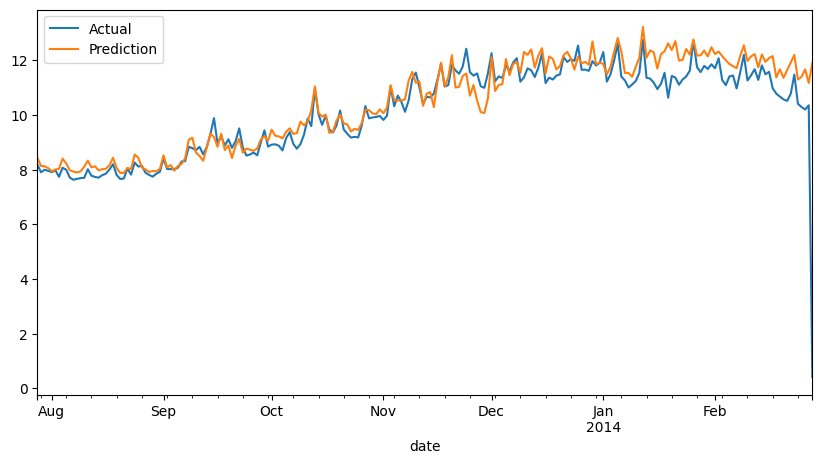

MAE: 0.44123818524317965
MAPE: 0.1644001320544813
MSE: 0.864698398183634


In [34]:
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)

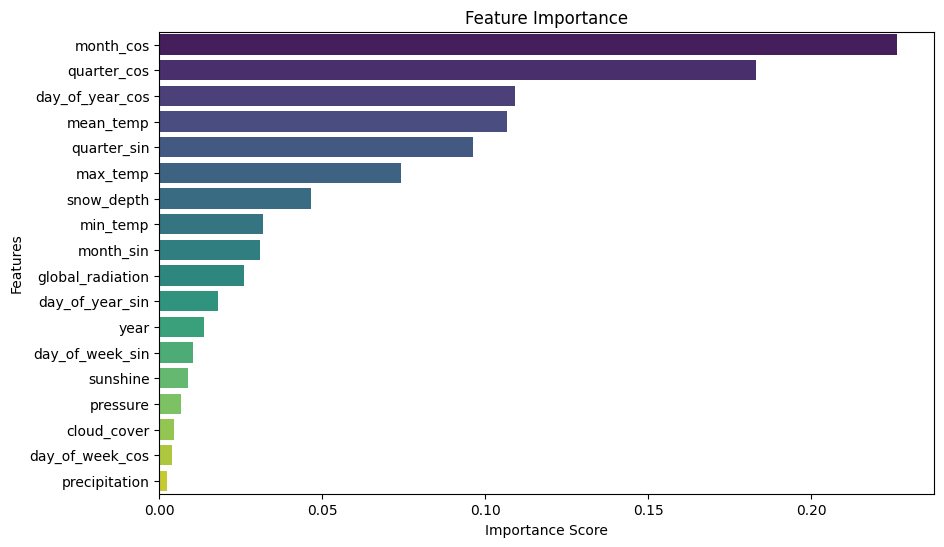

In [35]:
# Mendapatkan model terbaik dari grid search
best_model = grid_search.best_estimator_
feature_importance = best_model.feature_importances_
feature = [
    'day_of_week_sin', 'day_of_week_cos',  # Sin dan cos untuk hari dalam seminggu
    'day_of_year_sin', 'day_of_year_cos',  # Sin dan cos untuk hari dalam setahun
    'month_sin', 'month_cos',              # Sin dan cos untuk bulan
    'quarter_sin', 'quarter_cos',          # Sin dan cos untuk kuartal
    'year',                                # Tetap menyertakan tahun untuk tren
    'cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 
    'mean_temp', 'min_temp', 'precipitation', 'pressure',
    'snow_depth'                           # Variabel cuaca
]

importance_df = pd.DataFrame({
    'Features': feature,
    'Importance': feature_importance
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Features', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [36]:
### Before SinCos
# MAE: 0.41222399123657294
# MAPE: 0.16246850639888177
# MSE: 0.8432288584575132

### After SinCos
# MAE: 0.44123818524317965
# MAPE: 0.1644001320544813
# MSE: 0.864698398183634

## Part II

In [37]:
from matplotlib.offsetbox import AnchoredText
from statsmodels.graphics.tsaplots import plot_pacf
import math

In [38]:
def plot_lag(x, lag=1, ax=None, **kwargs):
    x_ = x.shift(lag)
    y_ = x
    
    if ax is None:
        fig, ax = plt.subplots()
    
    scatter_kws = dict(
        alpha=0.75,
        s=3
    )
    line = dict(color='C3', )
    
    ax = sns.regplot(x=x_,
                    y=y_,
                    scatter_kws=scatter_kws,
                    line_kws=line,
                    ax=ax,
                    **kwargs)
    
    # Adding Corelation on plot
    at = AnchoredText(
        f"{y_.corr(x_):.2f}",
        prop=dict(size='large'),
        frameon=True,
        loc='upper left',
    )
    at.patch.set_boxstyle('square, pad=0.0')
    ax.add_artist(at)
    ax.set(title=f'Lag {lag}', xlabel='x_.name', ylabel='y_.name')
    
    return ax

def plot_autocorrelation(x, lags=6, lagplot_kwargs={}, **kwargs):
    kwargs.setdefault("nrows", 2)
    kwargs.setdefault("ncols", math.ceil(lags / 2))
    kwargs.setdefault("figsize", (kwargs["ncols"] * 2, 2  * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(2 * kwargs["ncols"])):
        if k + 1 <= lags:
            ax = plot_lag(x, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag #{k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis("off")
    plt.setp(axs[-1, :], xlabel=x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    
    return fig

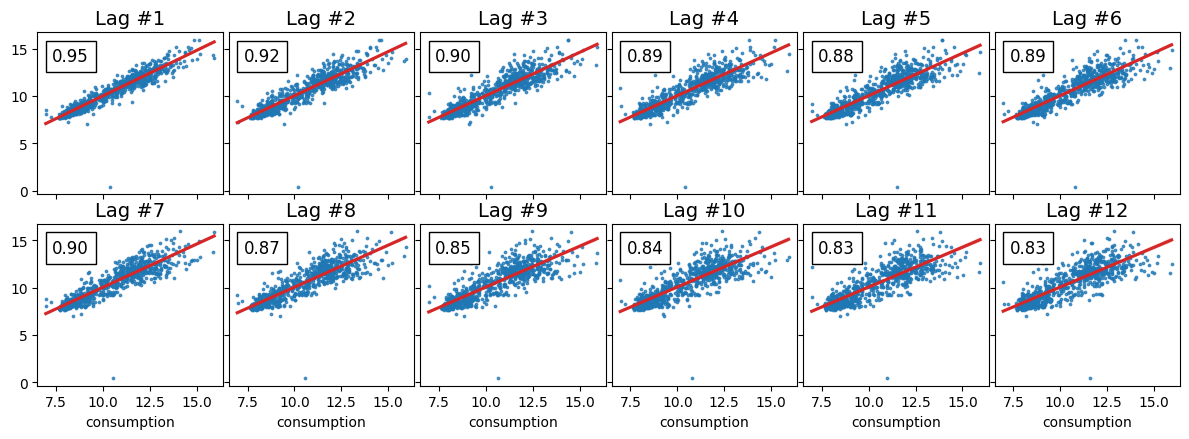

In [39]:
_ = plot_autocorrelation(df_avg_consumption['consumption'], lags=12)

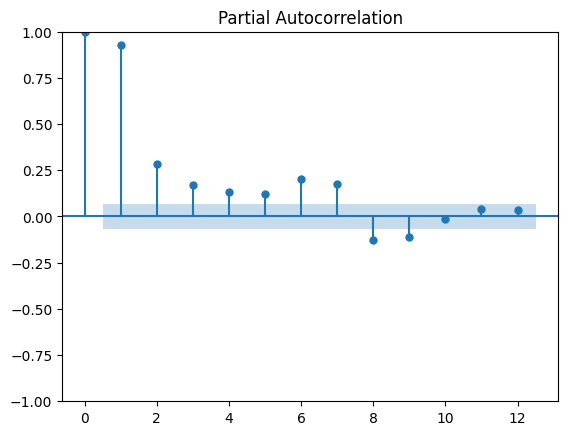

In [40]:
_ = plot_pacf(df_avg_consumption['consumption'], lags=12)

In [41]:
def create_lag_features(df, lags=2):
    y = df_avg_consumption.loc[:, "consumption"]
    for lag in range(lags):
        df[f"lag_{lag + 1}"] = y.shift(lag + 1)
    
    return df

df_avg_consumption = create_lag_features(df_avg_consumption, lags=12)
df_avg_consumption

,date,consumption,day_of_week,day_of_year,month,quarter,year,day_of_week_sin,day_of_week_cos,day_of_year_sin,...,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2011-11-23,6.952692,2,327,11,4,2011,0.974928,-0.222521,-0.608477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-11-24,8.536480,3,328,11,4,2011,0.433884,-0.900969,-0.594727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-11-25,9.499781,4,329,11,4,2011,-0.433884,-0.900969,-0.580800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-11-26,10.267707,5,330,11,4,2011,-0.974928,-0.222521,-0.566702,...,6.952692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-11-27,10.850805,6,331,11,4,2011,-0.781831,0.623490,-0.552435,...,8.536480,6.952692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,2014-02-24,10.411403,0,55,2,1,2014,0.000000,1.000000,0.811539,...,10.518126,10.573835,10.674624,10.781898,10.979566,11.582159,11.490470,11.816914,11.285737,11.679099
825,2014-02-25,10.294997,1,56,2,1,2014,0.781831,0.623490,0.821477,...,10.776242,10.518126,10.573835,10.674624,10.781898,10.979566,11.582159,11.490470,11.816914,11.285737
826,2014-02-26,10.202945,2,57,2,1,2014,0.974928,-0.222521,0.831171,...,11.480411,10.776242,10.518126,10.573835,10.674624,10.781898,10.979566,11.582159,11.490470,11.816914
827,2014-02-27,10.356350,3,58,2,1,2014,0.433884,-0.900969,0.840618,...,10.411403,11.480411,10.776242,10.518126,10.573835,10.674624,10.781898,10.979566,11.582159,11.490470


In [42]:
df_avg_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              829 non-null    datetime64[ns]
 1   consumption       829 non-null    float64       
 2   day_of_week       829 non-null    int32         
 3   day_of_year       829 non-null    int32         
 4   month             829 non-null    int32         
 5   quarter           829 non-null    int32         
 6   year              829 non-null    int32         
 7   day_of_week_sin   829 non-null    float64       
 8   day_of_week_cos   829 non-null    float64       
 9   day_of_year_sin   829 non-null    float64       
 10  day_of_year_cos   829 non-null    float64       
 11  month_sin         829 non-null    float64       
 12  month_cos         829 non-null    float64       
 13  quarter_sin       829 non-null    float64       
 14  quarter_cos       829 non-

In [43]:
# Definisikan fungsi untuk melatih dan mengevaluasi model
def train_and_evaluate(X_train, y_train, X_test, y_test, lag_name):
    # Inisialisasi model XGBRegressor
    xgb_model = XGBRegressor()

    # Set parameter untuk GridSearchCV
    parameters = {
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1],
        'n_estimators': [100, 200],
        'colsample_bytree': [0.3, 0.7]
    }

    # TimeSeriesSplit untuk validasi waktu
    cv_split = TimeSeriesSplit(n_splits=4)

    # Melakukan grid search
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters, cv=cv_split)
    grid_search.fit(X_train, y_train)

    # Mendapatkan model terbaik dari grid search
    best_model = grid_search.best_estimator_

    # Prediksi pada test set
    prediction = best_model.predict(X_test)

    # Evaluasi model
    print(f"Best parameters for {lag_name}: {grid_search.best_params_}")
    print(f"Best score for {lag_name}: {grid_search.best_score_}")

    # Visualisasi dan evaluasi model (gunakan fungsi yang sesuai dengan implementasimu)
    plot_predictions(testing_dates, y_test, prediction)
    evaluate_model(y_test, prediction)

In [45]:
training_mask = df_avg_consumption["date"] < "2013-07-28"
training_data = df_avg_consumption.loc[training_mask]

testing_mask = df_avg_consumption["date"] >= "2013-07-28"
testing_data = df_avg_consumption.loc[testing_mask]

training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

In [46]:
# Model dengan lag 4
X_train_lag4 = training_data[
    [
        'day_of_week_sin', 'day_of_week_cos', 'day_of_year_sin', 'day_of_year_cos',
        'month_sin', 'month_cos', 'quarter_sin', 'quarter_cos', 'year',
        'cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp',
        'min_temp', 'precipitation', 'pressure', 'snow_depth', 'lag_1', 'lag_2', 'lag_3', 'lag_4'
    ]
]
X_test_lag4 = testing_data[
    [
        'day_of_week_sin', 'day_of_week_cos', 'day_of_year_sin', 'day_of_year_cos',
        'month_sin', 'month_cos', 'quarter_sin', 'quarter_cos', 'year',
        'cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp',
        'min_temp', 'precipitation', 'pressure', 'snow_depth', 'lag_1', 'lag_2', 'lag_3', 'lag_4'
    ]
]

In [48]:
# Model dengan lag 9
X_train_lag9 = training_data[
    [
        'day_of_week_sin', 'day_of_week_cos', 'day_of_year_sin', 'day_of_year_cos',
        'month_sin', 'month_cos', 'quarter_sin', 'quarter_cos', 'year',
        'cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp',
        'min_temp', 'precipitation', 'pressure', 'snow_depth', 
        'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9'
    ]
]
X_test_lag9 = testing_data[
    [
        'day_of_week_sin', 'day_of_week_cos', 'day_of_year_sin', 'day_of_year_cos',
        'month_sin', 'month_cos', 'quarter_sin', 'quarter_cos', 'year',
        'cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp',
        'min_temp', 'precipitation', 'pressure', 'snow_depth', 
        'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9'
    ]
]

In [49]:
# Model dengan lag 12
X_train_lag12 = training_data[
    [
        'day_of_week_sin', 'day_of_week_cos', 'day_of_year_sin', 'day_of_year_cos',
        'month_sin', 'month_cos', 'quarter_sin', 'quarter_cos', 'year',
        'cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp',
        'min_temp', 'precipitation', 'pressure', 'snow_depth', 
        'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 
        'lag_9', 'lag_10', 'lag_11', 'lag_12'
    ]
]
X_test_lag12 = testing_data[
    [
        'day_of_week_sin', 'day_of_week_cos', 'day_of_year_sin', 'day_of_year_cos',
        'month_sin', 'month_cos', 'quarter_sin', 'quarter_cos', 'year',
        'cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp',
        'min_temp', 'precipitation', 'pressure', 'snow_depth', 
        'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 
        'lag_9', 'lag_10', 'lag_11', 'lag_12'
    ]
]

Best parameters for 4 Lag: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best score for 4 Lag: 0.35096523648903355


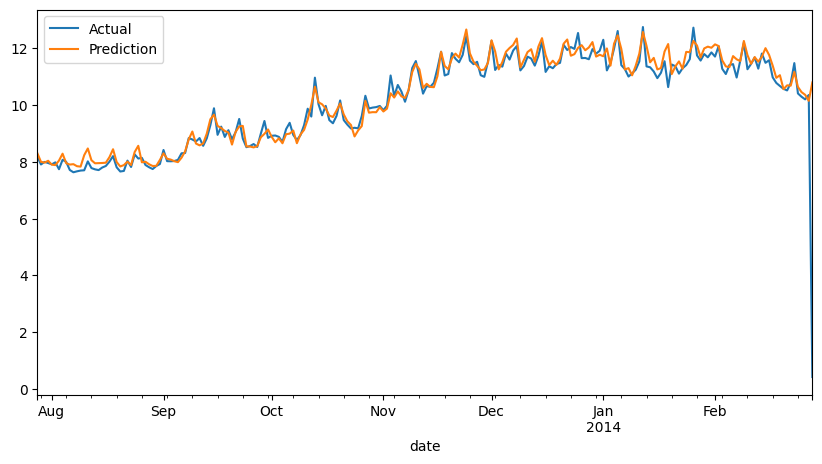

MAE: 0.2562075708368261
MAPE: 0.13533768114934755
MSE: 0.5739240310138521


In [50]:
train_and_evaluate(X_train_lag4, y_train, X_test_lag4, y_test, '4 Lag')

Best parameters for 9 Lag: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best score for 9 Lag: 0.42779677282229767


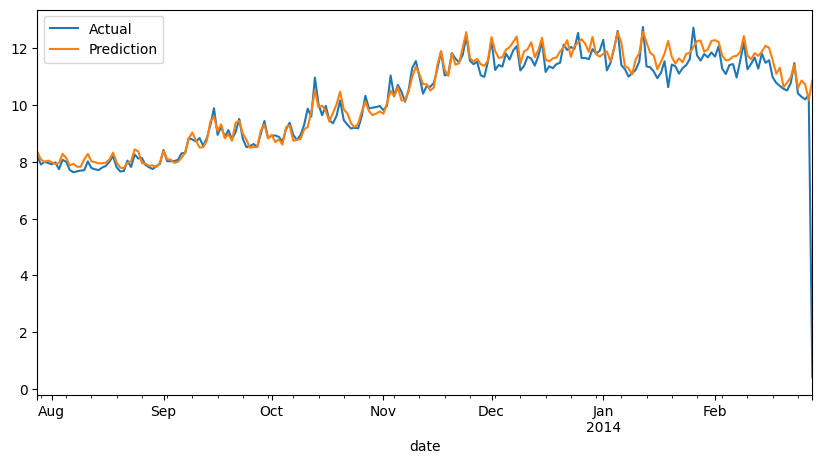

MAE: 0.28516560674903063
MAPE: 0.13853211336832058
MSE: 0.603914894569296


In [51]:
train_and_evaluate(X_train_lag9, y_train, X_test_lag9, y_test, '9 Lag')

Best parameters for 12 Lag: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best score for 12 Lag: 0.30865227962587394


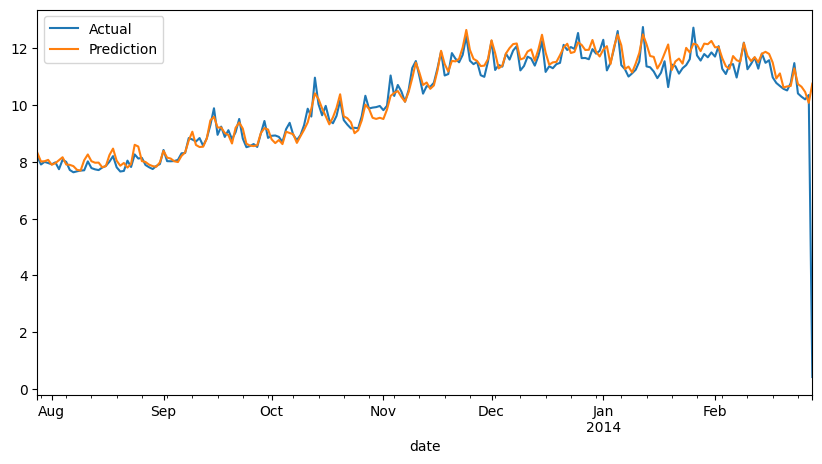

MAE: 0.268522694900798
MAPE: 0.13591788714279535
MSE: 0.5779177659558852


In [52]:
train_and_evaluate(X_train_lag12, y_train, X_test_lag12, y_test, '12 Lag')

In [ ]:
### Before Lag
### Before SinCos
# MAE: 0.41222399123657294
# MAPE: 0.16246850639888177
# MSE: 0.8432288584575132

### After SinCos
# MAE: 0.44123818524317965
# MAPE: 0.1644001320544813
# MSE: 0.864698398183634

### 4 Lag With SinCos
# MAE: 0.2562075708368261
# MAPE: 0.13533768114934755
# MSE: 0.5739240310138521

### 9 Lag With SinCos
# MAE: 0.28516560674903063
# MAPE: 0.13853211336832058
# MSE: 0.603914894569296

### 12 Lag With SinCos
# MAE: 0.268522694900798
# MAPE: 0.13591788714279535
# MSE: 0.5779177659558852